## Preethi R.M
## Mobile Phone Data Analysis

**Problem Statement**
- Analyse which brand phone has the maximum sales and what factors lead to the maximum sales of that particular brand

**Column Explanation**
1. Unnamed: 0     - ID column.
2. brand_name     - The name of brand which manufactures the phone.
3. model_name     - The name of phone's model.
4. os             - The operating system of the phone.
5. popularity     - The popularity of the phone in range 1-1224. 1224 is the most popular and 1 is least popular.
6. best_price     - Best price of the price-range
7. lowest_price   - Lowest price of the price-range
8. highest_price  - Highest price of the price-range
9. sellers_amount - The amount of sellers, who sale this phone.
10. screen_size   - The size of phone's screen (inches).
11. memory_size   - The size of phone's memory (GB)
12. battery_size  - The size of phone's battery (mAh).

**Questions**
1.	What was the percentage of top 3 selling mobiles?
2.	What is the price range people prefer for buying mobiles?
3.	when was the time period mobile phone usage maximised and popularised?
4.	What is the most popular OS used in terms of percentage?
5.	What factors leads to the maximum sales for the top 3 selling brands?


In [1]:
#Importing the required libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
import dabl
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
import plotly.express as px

In [2]:
#Reading the CSV Dataset
data = pd.read_csv('phones_data.csv')
data.head()

Unnamed: 0 brand_name                                    model_name  \
0           0    ALCATEL          1 1/8GB Bluish Black (5033D-2JALUAA)   
1           1    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
2           2    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
3           3    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
4           4      Nokia                           1.3 1/16GB Charcoal   

        os  popularity  best_price  lowest_price  highest_price  \
0  Android         422      1690.0        1529.0         1819.0   
1  Android         323      1803.0        1659.0         2489.0   
2  Android         299      1803.0        1659.0         2489.0   
3  Android         287      1803.0        1659.0         2489.0   
4  Android        1047      1999.0           NaN            NaN   

   sellers_amount  screen_size  memory_size  battery_size release_date  
0              36         5.00          8.0        2000.0      10-2020  
1              36         5.00         16.0        2000.0       9-2020  
2              36         5.00         16.0        2000.0       9-2020  
3              36         5.00         16.0        2000.0       9-2020  
4              10         5.71         16.0        3000.0       4-2020

In [3]:
data.tail()

Unnamed: 0    brand_name                                model_name  \
1219        1219         Apple           iPhone XS Max 64GB Gold (MT522)   
1220        1220         Apple  iPhone XS Max Dual Sim 64GB Gold (MT732)   
1221        1221        HUAWEI          nova 5T 6/128GB Black (51094MEU)   
1222        1222           ZTE          nubia Red Magic 5G 8/128GB Black   
1223        1223  Sigma mobile                         x-style 35 Screen   

           os  popularity  best_price  lowest_price  highest_price  \
1219      iOS        1101     22685.0       16018.0        27900.0   
1220      iOS         530     24600.0       21939.0        33720.0   
1221  Android        1174      8804.0        7999.0         9999.0   
1222  Android         752     18755.0       18500.0        19010.0   
1223      NaN         952       907.0         785.0          944.0   

      sellers_amount  screen_size  memory_size  battery_size release_date  
1219              61         6.50         64.0        3174.0       9-2018  
1220              28         6.50         64.0        3174.0       9-2018  
1221              18         6.26        128.0        3750.0      11-2019  
1222               2         6.65        128.0        4500.0      10-2020  
1223              75         3.50          NaN        1750.0       1-2020

In [4]:
# To display the columns in dataset
data.columns

Index(['Unnamed: 0', 'brand_name', 'model_name', 'os', 'popularity',
       'best_price', 'lowest_price', 'highest_price', 'sellers_amount',
       'screen_size', 'memory_size', 'battery_size', 'release_date'],
      dtype='object')

In [5]:
# Renaming the unnamed column
data.rename(
    columns=({ 'Unnamed: 0': 'Id'}), 
    inplace=True,
)

In [6]:
# After renaming the unnmaed column
data.columns

Index(['Id', 'brand_name', 'model_name', 'os', 'popularity', 'best_price',
       'lowest_price', 'highest_price', 'sellers_amount', 'screen_size',
       'memory_size', 'battery_size', 'release_date'],
      dtype='object')

### Data Cleaning

In [7]:
# Sum missing values 
data.isna().sum()

Id                  0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

In [8]:
# Drop na values
Mobile_data=data.dropna()

In [9]:
# Sum missing values 
Mobile_data.isna().sum()

Id                0
brand_name        0
model_name        0
os                0
popularity        0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
release_date      0
dtype: int64

### Data Analysis

In [10]:
#Finding Shape of Dataset
Mobile_data.shape

(780, 13)

In [11]:
#Finding the Data type of the DataSet
Mobile_data.dtypes

Id                  int64
brand_name         object
model_name         object
os                 object
popularity          int64
best_price        float64
lowest_price      float64
highest_price     float64
sellers_amount      int64
screen_size       float64
memory_size       float64
battery_size      float64
release_date       object
dtype: object

In [12]:
# A Concise Summary of a DataFrame
Mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 1222
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              780 non-null    int64  
 1   brand_name      780 non-null    object 
 2   model_name      780 non-null    object 
 3   os              780 non-null    object 
 4   popularity      780 non-null    int64  
 5   best_price      780 non-null    float64
 6   lowest_price    780 non-null    float64
 7   highest_price   780 non-null    float64
 8   sellers_amount  780 non-null    int64  
 9   screen_size     780 non-null    float64
 10  memory_size     780 non-null    float64
 11  battery_size    780 non-null    float64
 12  release_date    780 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 85.3+ KB


In [13]:
#Some descriptive stats of the numerical variables.
Mobile_data.describe()

Id   popularity    best_price  lowest_price  highest_price  \
count   780.000000   780.000000    780.000000    780.000000     780.000000   
mean    635.810256   729.238462  10203.064103   9214.326923   11751.229487   
std     342.304633   338.209052   9612.168455   8652.375633   11693.361223   
min       0.000000     2.000000   1036.000000    899.000000    1059.000000   
25%     374.750000   475.500000   3759.000000   3499.000000    3999.000000   
50%     641.500000   783.500000   5931.000000   5547.000000    6512.500000   
75%     909.250000  1017.250000  13904.250000  12425.500000   16057.750000   
max    1222.000000  1224.000000  55338.000000  45799.000000   64999.000000   

       sellers_amount  screen_size  memory_size  battery_size  
count      780.000000   780.000000   780.000000    780.000000  
mean        20.226923     6.060462   112.287179   4121.117949  
std         22.330371     0.626583   117.754426   1406.849509  
min          2.000000     2.400000     4.000000   1500.000000  
25%          4.000000     5.700000    32.000000   3174.000000  
50%         11.000000     6.215000    64.000000   4000.000000  
75%         29.000000     6.500000   128.000000   5000.000000  
max        125.000000     8.100000  1000.000000  13000.000000

In [14]:
#Some descriptive stats of the categorical variables(non-numerical variables)
Mobile_data.describe(include=['object'])

brand_name                             model_name       os release_date
count         780                                    780      780          780
unique         42                                    704        5           60
top       Samsung  Galaxy A70 2019 SM-A7050 6/128GB Blue  Android      10-2020
freq          142                                      3      682           68

### Data Visualization

C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sellers_amount', ylabel='Density'>

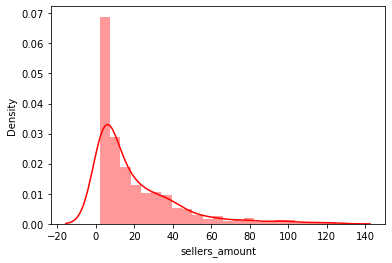

In [15]:
# Distplot
sns.distplot(Mobile_data['sellers_amount'],color='red')

    -- Distribution plot for given DataSet to check any outliers or not

C:\Users\preet\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

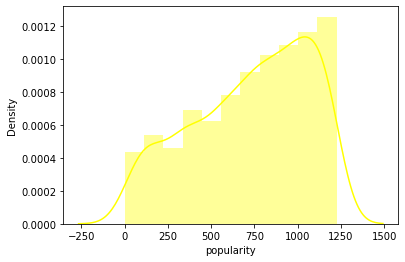

In [16]:
# Distplot
sns.distplot(Mobile_data['popularity'],color='yellow')

    -- Distribution plot for given DataSet to check any outliers or not

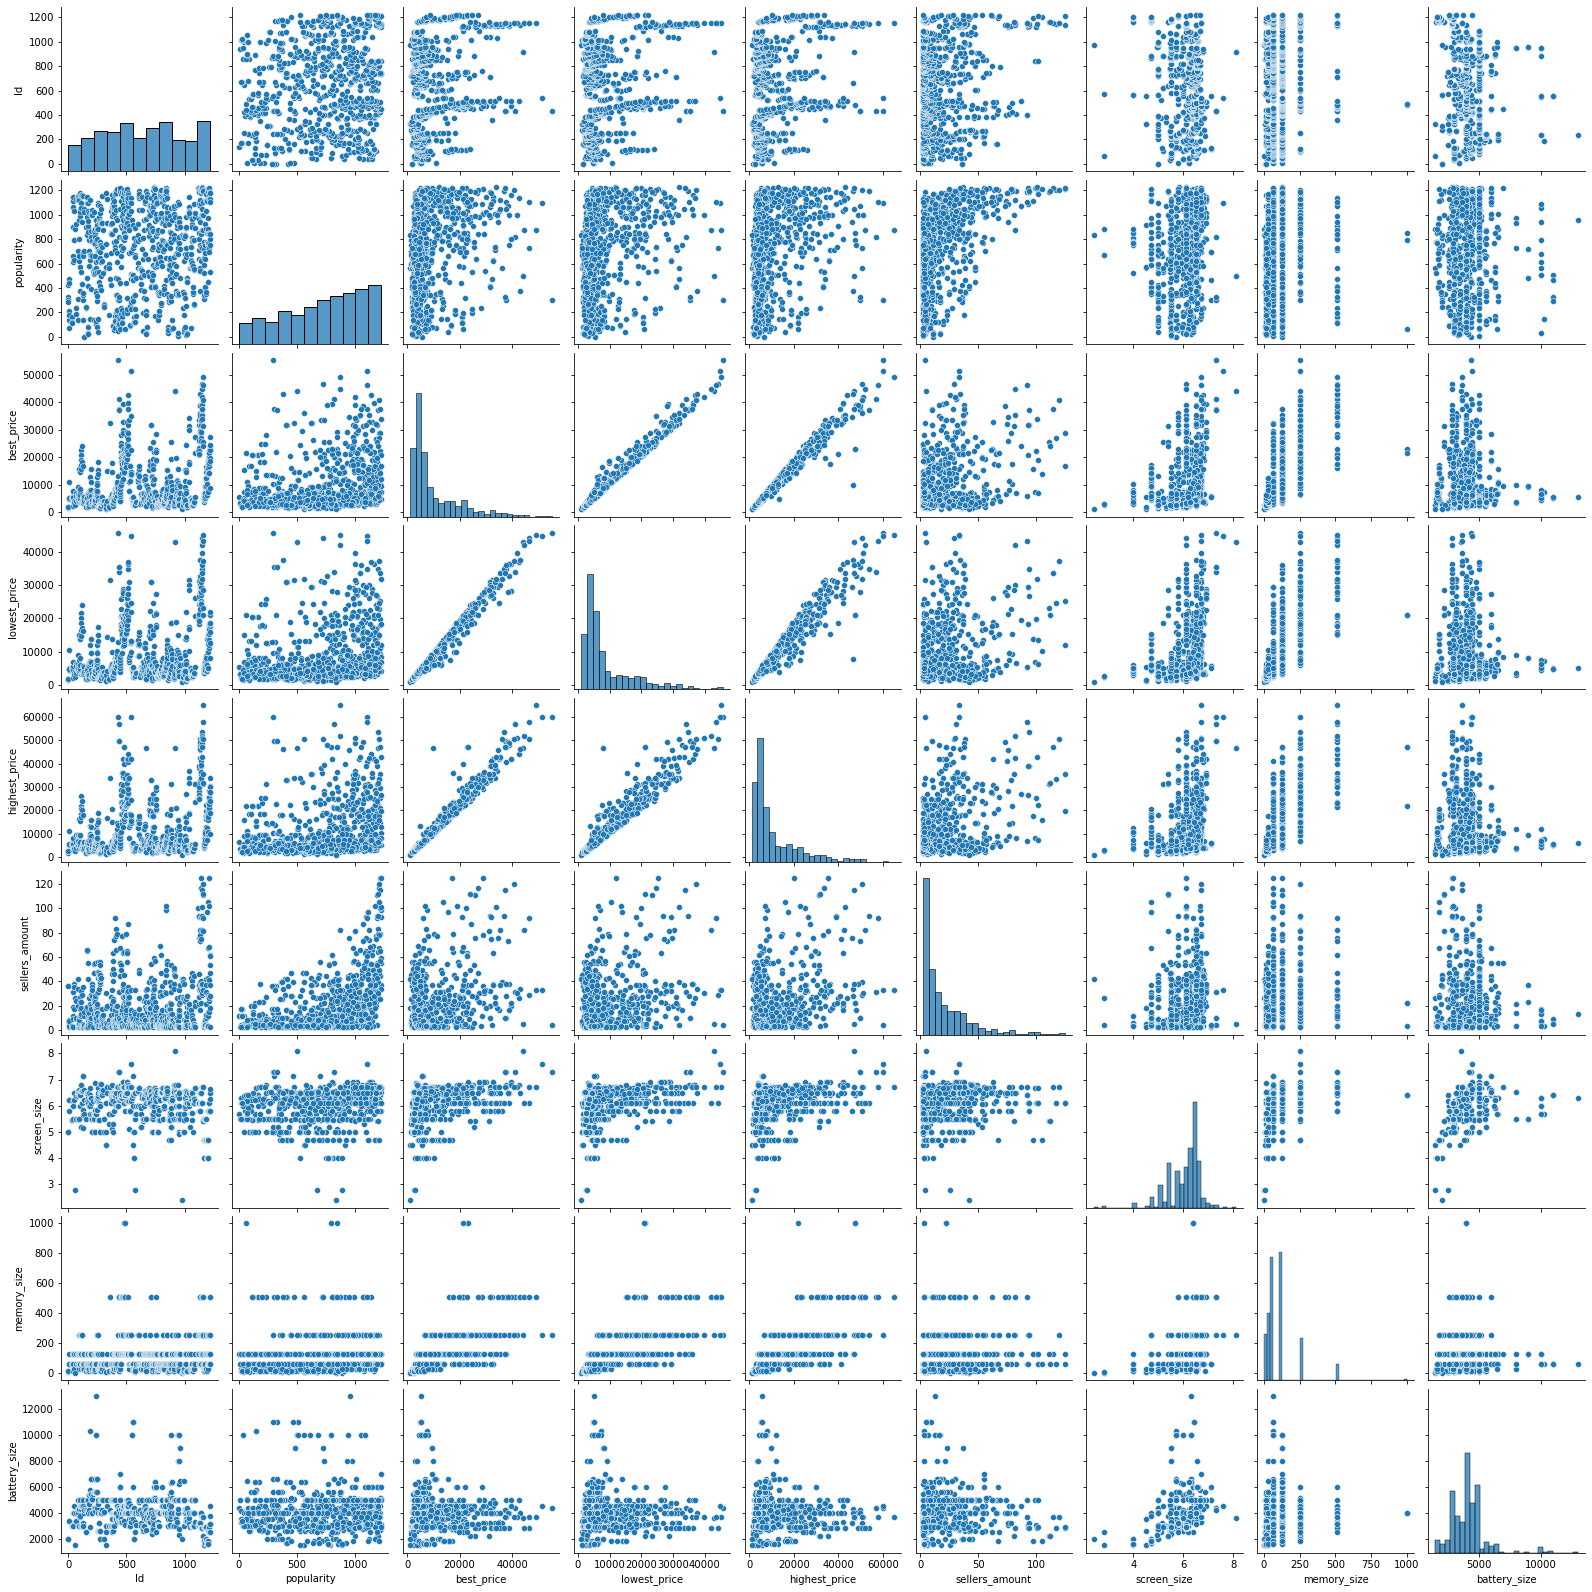

In [17]:
# Pairplot
sns.pairplot(Mobile_data)

    -- Pair plot is to Visualize pairwise relationships in a dataset

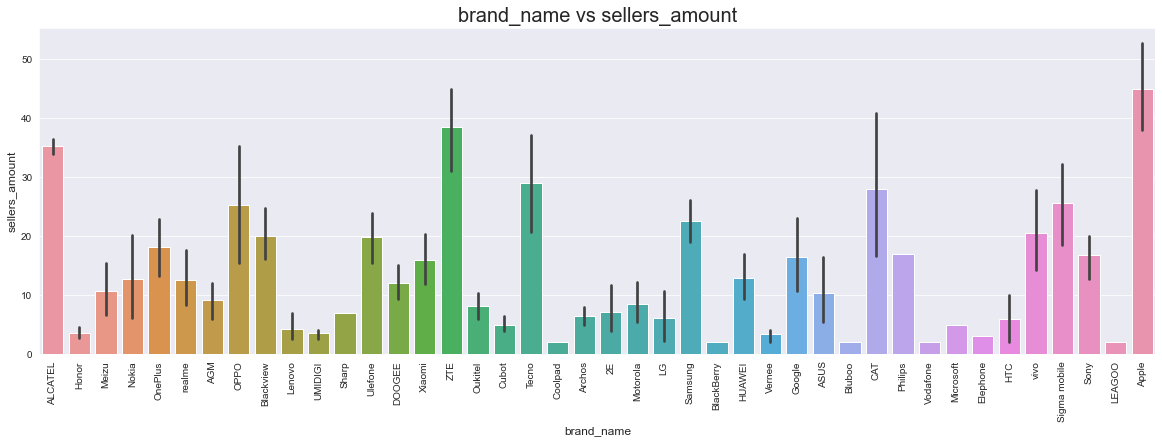

In [18]:
# Borplot
sns.set_style('darkgrid')
plt.figure(figsize =(20,6))
sns.barplot(x= Mobile_data['brand_name'],y= Mobile_data['sellers_amount'])
plt.title('brand_name vs sellers_amount',size=20)
plt.xticks(rotation=90)
plt.ylabel('sellers_amount', size=12)
plt.xlabel('brand_name', size=12)
plt.show()

    --By looking at the above plot we can observe that Apple brand as the most sellers amount 

## Questions

### What was the percentage of top 3 selling mobiles?

In [19]:
#Grouping product name column
Prod_sales = pd.DataFrame(Mobile_data.groupby('brand_name').sum()['sellers_amount'])

In [20]:
#Sorting Prod_sales column
Prod_sales = pd.DataFrame(Prod_sales.sort_values('sellers_amount',ascending=False))

In [21]:
top_Brands=pd.DataFrame(Prod_sales[:10])
top_Brands

sellers_amount
brand_name                  
Apple                   4091
Samsung                 3198
Xiaomi                  1445
Blackview                800
ZTE                      733
HUAWEI                   506
Ulefone                  498
OPPO                     455
DOOGEE                   398
Sigma mobile             385

In [22]:
Prod_sales_per1 = pd.DataFrame(Mobile_data.groupby('brand_name').sum()['sellers_amount'])
Prod_sales_per1 = pd.DataFrame(Prod_sales_per1.sort_values('sellers_amount',ascending=False).reset_index(drop=False))
fig = px.pie(Prod_sales_per1, values=Prod_sales_per1.sellers_amount, names=Prod_sales_per1.brand_name, title='Mobile sales',width=800,height=700)
fig.show()

**Conclusion:**
- The top-selling brands are Apple,Samsung and Xiaomi with the percentage of 25.9%,20.3% and 9.16%.
- From the graph we can observe that the three top selling brands cover a percentage of 55.36% while the remaining brands cover 44.64%.
- So these are the top selling brands.

### What is the price range people prefer for buying mobiles?

In [23]:
fig = px.histogram(Mobile_data, x="best_price", y="sellers_amount",color="brand_name")
fig.show()

**Conclusion:**
- Most of the population perfer buying mobiles between the range 2k to 4k.
- People perfer apple phones between the range 16k to 18k or 22k to 24k.
- People perfer Samsung and Xiaomi phones between the range 4k to 8k.


### When was the time period mobile phone usage maximised and popularised?

In [24]:
fig = px.histogram(Mobile_data, x="release_date", y="sellers_amount",color="brand_name")
fig.show()

**Conclusion:**
- In the year of 2020, mobile phones usage maximised and popularised.


### What is the most popular OS used in terms of percentage?

In [25]:
os_sales_per1 = pd.DataFrame(Mobile_data.groupby('brand_name').max()['os'])
os_sales_per1 = pd.DataFrame(os_sales_per1.sort_values('os',ascending=False).reset_index(drop=False))
fig = px.bar(os_sales_per1, x="os",color="brand_name")
fig.show()

In [26]:
fig = px.pie(Mobile_data, values=Mobile_data.sellers_amount, names=Mobile_data.os, title='Percentage of OS used',width=500,height=500)
fig.show()

**Conclusion:**
- The most popular OS used is Android (73.3%) and the second most used OS is IOS(26.1%)

### Which factors lead to the maximum sales?(using covariance)

In [27]:
cov(Mobile_data['sellers_amount'],Mobile_data['battery_size'])

array([[ 4.98645487e+02, -1.47005376e+03],
       [-1.47005376e+03,  1.97922554e+06]])

In [28]:
cov(Mobile_data['sellers_amount'],Mobile_data['popularity'])

array([[   498.64548731,   3850.23721734],
       [  3850.23721734, 114385.36283203]])

In [29]:
cov(Mobile_data['sellers_amount'],Mobile_data['screen_size'])

array([[4.98645487e+02, 1.39985662e+00],
       [1.39985662e+00, 3.92605948e-01]])

In [30]:
cov(Mobile_data['sellers_amount'],Mobile_data['memory_size'])

array([[  498.64548731,   348.03230967],
       [  348.03230967, 13866.10484184]])

**Conclusion:**
- We can observe that the number of the mobiles selled depends on various properties such as the memory size, screen size and popularity as it has a positive  covariance and battery size which has a negative covariance.
- So, we can conclude that factors like memory size, screen size and popularity can affect the sales of mobile phones. With good memory size, screen size and popularity, there is an increased number of sales for that particular mobile phone 

### Which mobile brands are the most popular?

In [31]:
brand_data = Mobile_data.copy(True)
brand_data = Mobile_data.groupby('brand_name').count()
brand_data = brand_data.sort_values('model_name', ascending=False)
brand_data

Id  model_name   os  popularity  best_price  lowest_price  \
brand_name                                                                 
Samsung       142         142  142         142         142           142   
Apple          91          91   91          91          91            91   
Xiaomi         91          91   91          91          91            91   
Blackview      40          40   40          40          40            40   
HUAWEI         39          39   39          39          39            39   
Motorola       34          34   34          34          34            34   
DOOGEE         33          33   33          33          33            33   
Ulefone        25          25   25          25          25            25   
Oukitel        20          20   20          20          20            20   
ZTE            19          19   19          19          19            19   
Honor          19          19   19          19          19            19   
OPPO           18          18   18          18          18            18   
Meizu          17          17   17          17          17            17   
realme         16          16   16          16          16            16   
OnePlus        16          16   16          16          16            16   
vivo           16          16   16          16          16            16   
Sigma mobile   15          15   15          15          15            15   
Google         15          15   15          15          15            15   
Tecno          13          13   13          13          13            13   
Nokia          12          12   12          12          12            12   
LG             11          11   11          11          11            11   
Cubot          10          10   10          10          10            10   
ALCATEL         8           8    8           8           8             8   
Sony            7           7    7           7           7             7   
ASUS            7           7    7           7           7             7   
CAT             6           6    6           6           6             6   
Lenovo          6           6    6           6           6             6   
2E              6           6    6           6           6             6   
AGM             5           5    5           5           5             5   
UMIDIGI         4           4    4           4           4             4   
Elephone        3           3    3           3           3             3   
Vernee          3           3    3           3           3             3   
Archos          2           2    2           2           2             2   
HTC             2           2    2           2           2             2   
Coolpad         2           2    2           2           2             2   
Sharp           1           1    1           1           1             1   
BlackBerry      1           1    1           1           1             1   
Philips         1           1    1           1           1             1   
Vodafone        1           1    1           1           1             1   
Microsoft       1           1    1           1           1             1   
LEAGOO          1           1    1           1           1             1   
Bluboo          1           1    1           1           1             1   

              highest_price  sellers_amount  screen_size  memory_size  \
brand_name                                                              
Samsung                 142             142          142          142   
Apple                    91              91           91           91   
Xiaomi                   91              91           91           91   
Blackview                40              40           40           40   
HUAWEI                   39              39           39           39   
Motorola                 34              34           34           34   
DOOGEE                   33              33           33           33   
Ulefone      

In [32]:
px.bar(x = brand_data.index, y = brand_data.model_name, color_discrete_sequence=['red'], 
       labels={'x': 'Brand', 'y': 'Phones amount'})

**Conclusion**:
- From the above graph and table, we can observe that samsung brand has the highest popularity

### When most of the phones were released?

In [33]:
released_data = Mobile_data.copy(True)
released_data['release_date'].value_counts(normalize=True).sort_values(ascending=False)

10-2020    0.087179
9-2020     0.052564
11-2020    0.050000
8-2020     0.047436
7-2020     0.046154
4-2020     0.041026
6-2020     0.035897
10-2019    0.033333
1-2021     0.033333
9-2019     0.033333
8-2019     0.030769
2-2019     0.030769
5-2020     0.029487
3-2020     0.029487
11-2019    0.028205
5-2019     0.025641
10-2018    0.023077
9-2018     0.021795
3-2019     0.021795
5-2018     0.020513
12-2020    0.020513
7-2019     0.017949
1-2020     0.016667
11-2018    0.016667
2-2018     0.014103
9-2016     0.014103
2-2020     0.011538
12-2019    0.011538
8-2018     0.011538
6-2018     0.008974
6-2019     0.008974
3-2017     0.008974
4-2019     0.008974
3-2018     0.007692
9-2015     0.007692
12-2018    0.006410
10-2017    0.006410
7-2017     0.006410
7-2018     0.006410
4-2018     0.005128
12-2017    0.005128
1-2019     0.005128
9-2014     0.005128
9-2017     0.005128
8-2017     0.005128
1-2018     0.005128
3-2016     0.005128
1-2017     0.003846
5-2017     0.002564
4-2016     0.002564


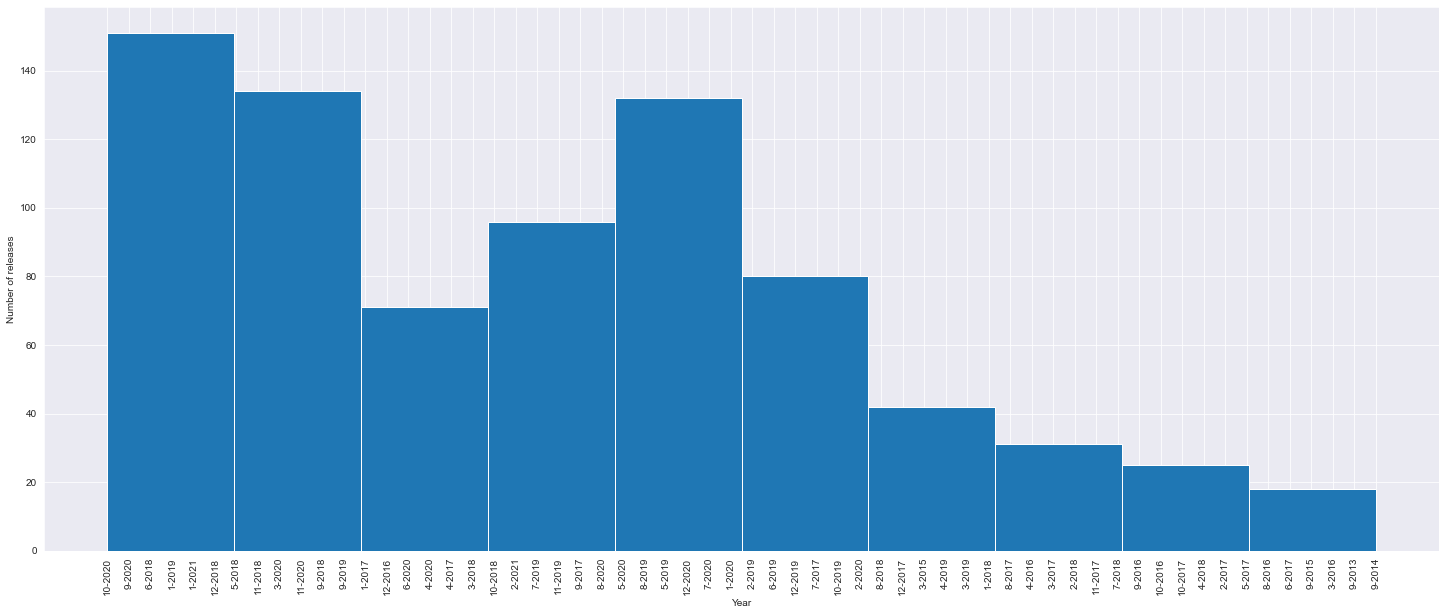

In [34]:
plt.figure(figsize =(25,10))
released_data['release_date'].value_counts()
released_data['release_date'].hist()
plt.xlabel('Year')
plt.ylabel('Number of releases')
plt.xticks(rotation=90)
plt.show()

**Conclusions:**
- A majority of mobiles are released between the time span may,2018 and october 2020

###  What factors lead to the maximum sales of that particular brand (Top 3)?

In [35]:
# Apple brand Mobile phones.
Apple=Mobile_data[Mobile_data['brand_name']=='Apple']
Apple_mean=Apple['sellers_amount'].mean()
Apple_mean

44.956043956043956

Target looks like regression


C:\Users\preet\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

C:\Users\preet\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\preet\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

C:\Users\preet\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

C:\Users\preet\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning:

FixedFormatter should only be used together with FixedLocator



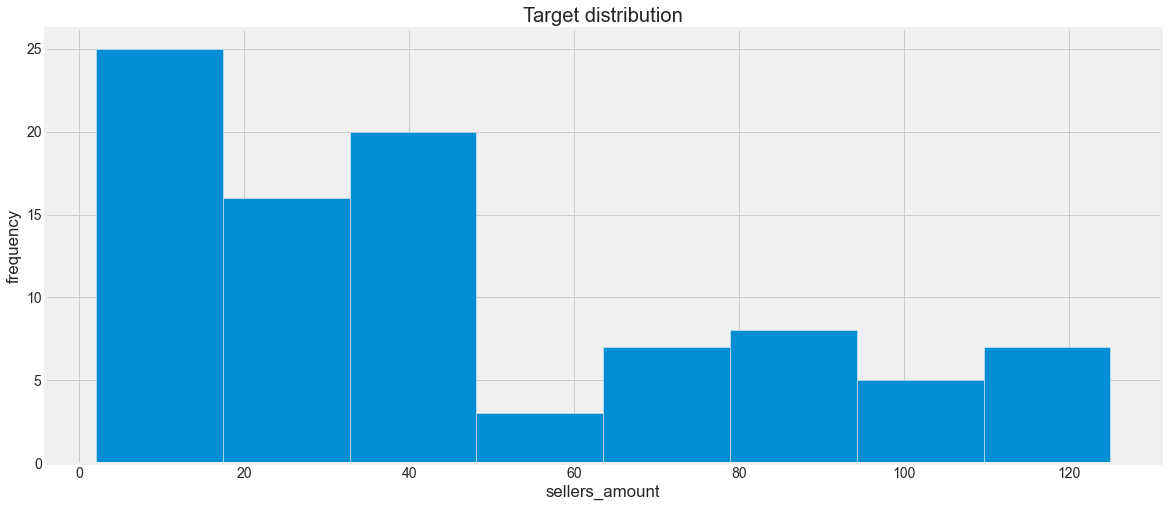

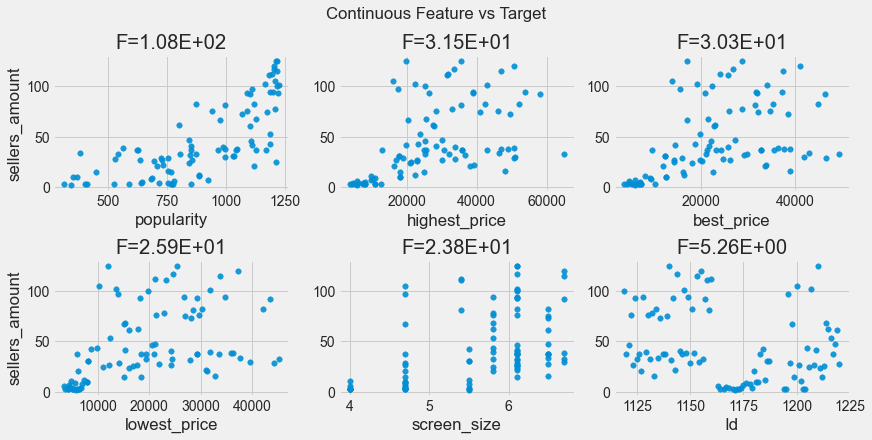

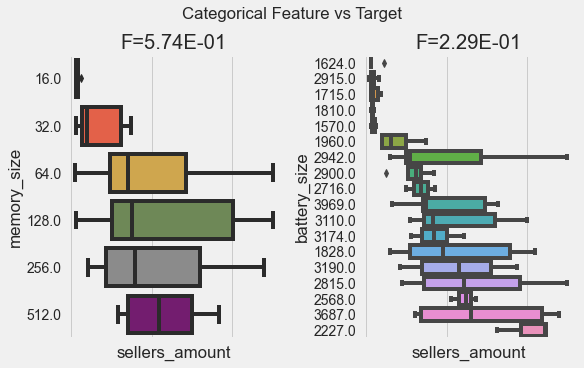

In [36]:
# Apple brand - Target column is sellers amount and plotting graph with other factors. 
plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')
dabl.plot(Apple,target_col = 'sellers_amount')
plt.show()

In [37]:
memory_size_Apple=Apple['memory_size']
battery_size_Apple=Apple['battery_size']
sellers_amount_Apple=Apple['sellers_amount']
popularity_Apple=Apple['popularity']
screen_size_Apple=Apple['screen_size']

In [38]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Apple,memory_size_Apple)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.213


In [39]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Apple,battery_size_Apple)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.351


In [40]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Apple,screen_size_Apple)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.459


In [41]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Apple,popularity_Apple)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.740


- From the above we can conclude that the sales of apple brand depends on factors like memory size, batter size, screen size and popularity
- With good memory size,screen size,popularity and battery size in a mobile phone, there can be an assurance of good sales of that brand/mobile phone.




In [42]:
# Samsung brand Mobile phones
Samsung=Mobile_data[Mobile_data['brand_name']=='Samsung']
Samsung_mean=Samsung['sellers_amount'].mean()
Samsung_mean

22.52112676056338

Target looks like regression


C:\Users\preet\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning:

Dropped 1 outliers in column Id.

C:\Users\preet\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

C:\Users\preet\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\preet\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

C:\Users\preet\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

C:\Users\preet\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning:

FixedFormatter should only be used together with FixedLocator



<function matplotlib.pyplot.show(close=None, block=None)>

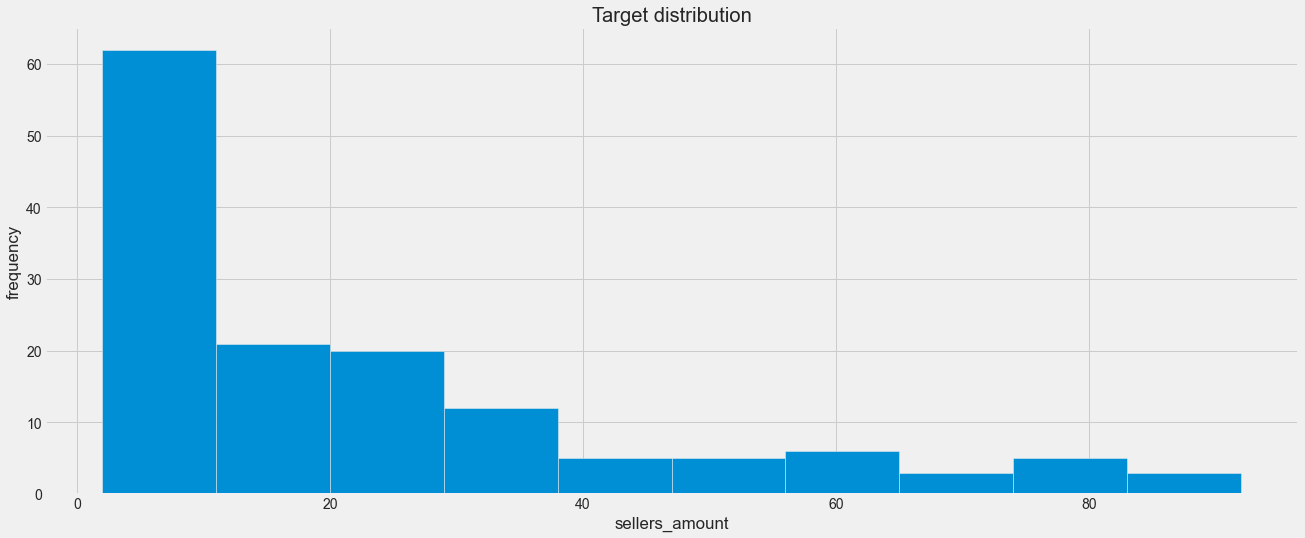

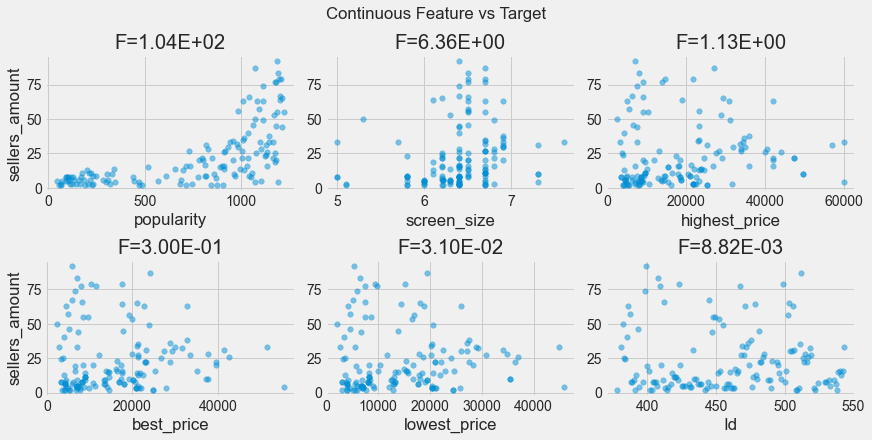

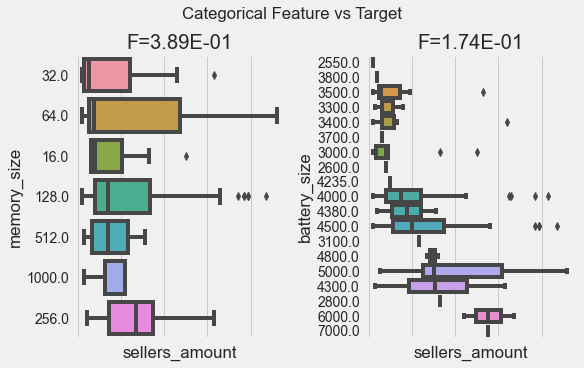

In [43]:
# Samsung brand - Target column is sellers amount and plotting graph with other factors. 
plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')
dabl.plot(Samsung,target_col = 'sellers_amount')
plt.show

In [44]:
memory_size_Samsung=Samsung['memory_size']
battery_size_Samsung=Samsung['battery_size']
sellers_amount_Samsung=Samsung['sellers_amount']
popularity_Samsung=Samsung['popularity']
screen_size_Samsung=Samsung['screen_size']

In [45]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Samsung,memory_size_Samsung)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient -0.053


In [46]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Samsung,battery_size_Samsung)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.440


In [47]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Samsung,screen_size_Samsung)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.208


In [48]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Samsung,popularity_Samsung)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.653


- From the above we can conclude that the sales of samsung brand depends on factors like memory size, batter size, screen size and popularity
- With good screen size,popularity and battery size in a mobile phone, there can be an assurance of good sales of that brand/mobile phone.However, the factor of memory size has a non-linear relationship with the sales


In [49]:
# Xiaomi brand Mobile phones.
Xiaomi=Mobile_data[Mobile_data['brand_name']=='Xiaomi']
Xiaomi_mean=Xiaomi['sellers_amount'].mean()
Xiaomi_mean

15.87912087912088

Target looks like regression


C:\Users\preet\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\preet\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

C:\Users\preet\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

C:\Users\preet\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning:

FixedFormatter should only be used together with FixedLocator



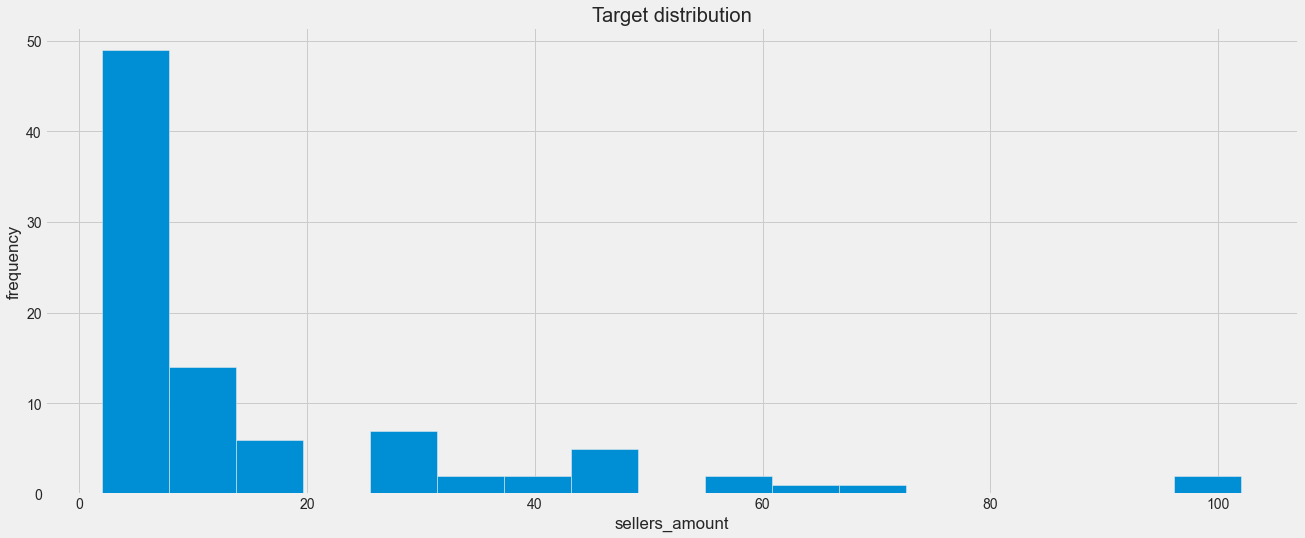

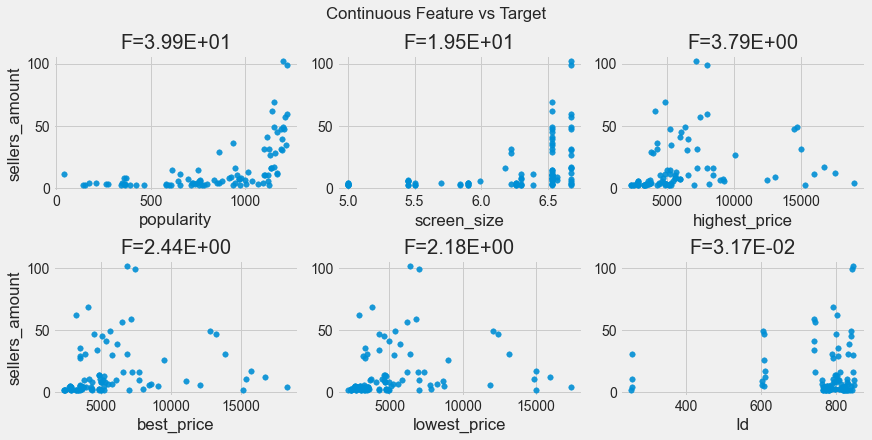

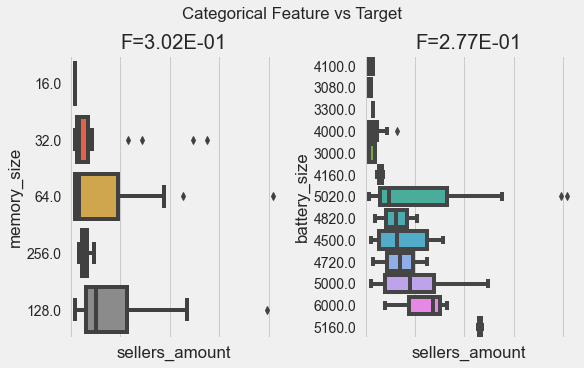

In [50]:
# Xiaomi brand - Target column is sellers amount and plotting graph with other factors. 
plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')
dabl.plot(Xiaomi,target_col = 'sellers_amount')
plt.show()

In [51]:
memory_size_Xiaomi=Xiaomi['memory_size']
battery_size_Xiaomi=Xiaomi['battery_size']
sellers_amount_Xiaomi=Xiaomi['sellers_amount']
popularity_Xiaomi=Xiaomi['popularity']
screen_size_Xiaomi=Xiaomi['screen_size']

In [52]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Xiaomi,memory_size_Xiaomi)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.061


In [53]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Xiaomi,battery_size_Xiaomi)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.475


In [54]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Xiaomi,screen_size_Xiaomi)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.424


In [55]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount_Xiaomi,popularity_Xiaomi)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.556


- From the above we can conclude that the sales of Xiomi brand depends on factors like memory size, batter size, screen size and popularity
- With good memory size,screen size,popularity and battery size in a mobile phone, there can be an assurance of good sales of that brand/mobile phone.


### What factors lead to the maximum sales of mobile phones (For over all Dataset)

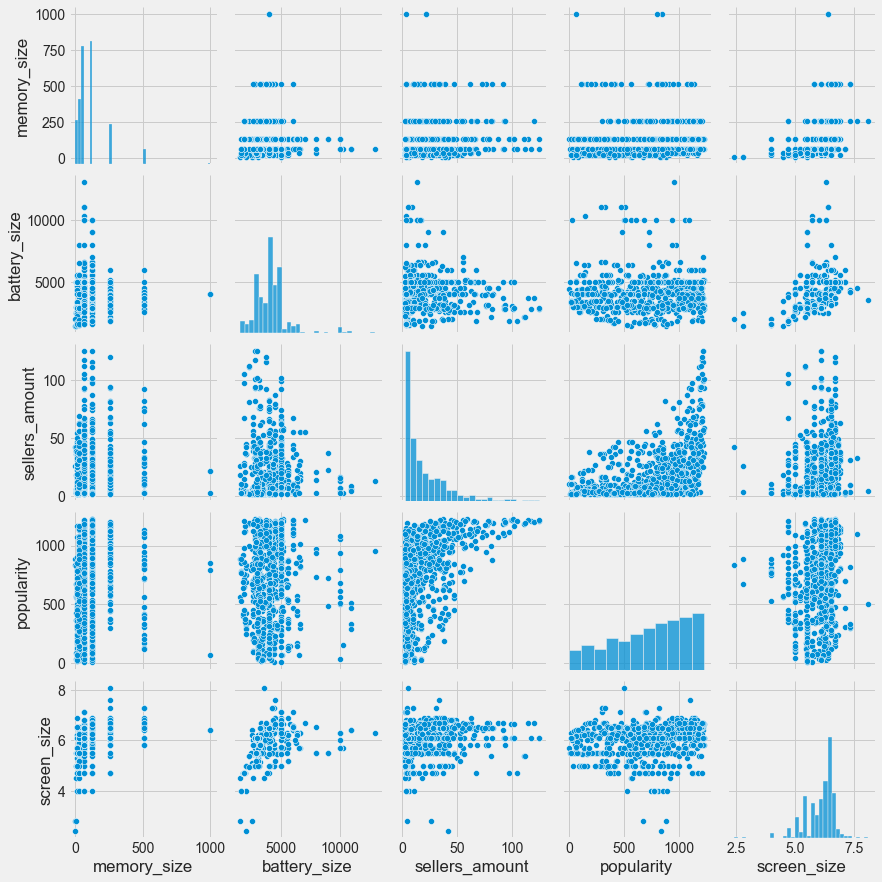

In [56]:
Phones =Mobile_data[['memory_size','battery_size','sellers_amount','popularity','screen_size']]
sns.pairplot(Phones)

In [57]:
memory_size=Mobile_data['memory_size']
battery_size=Mobile_data['battery_size']
sellers_amount=Mobile_data['sellers_amount']
popularity=Mobile_data['popularity']
screen_size=Mobile_data['screen_size']

pearsonr_cofficient,p_value=pearsonr(sellers_amount,memory_size)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.132


In [58]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount,battery_size)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient -0.047


In [59]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount,screen_size)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.100


In [60]:
pearsonr_cofficient,p_value=pearsonr(sellers_amount,popularity)
print('correlation cofficient %0.3f' %pearsonr_cofficient)

correlation cofficient 0.510


In [61]:
corr=Phones.corr()
corr

memory_size  battery_size  sellers_amount  popularity  \
memory_size        1.000000      0.016797        0.132357    0.119022   
battery_size       0.016797      1.000000       -0.046794    0.049806   
sellers_amount     0.132357     -0.046794        1.000000    0.509808   
popularity         0.119022      0.049806        0.509808    1.000000   
screen_size        0.337826      0.400950        0.100048    0.224490   

                screen_size  
memory_size        0.337826  
battery_size       0.400950  
sellers_amount     0.100048  
popularity         0.224490  
screen_size        1.000000

<AxesSubplot:>

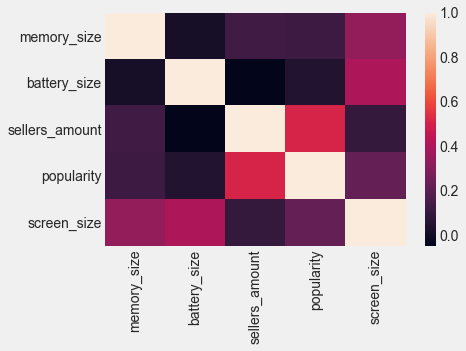

In [62]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

- From the above we can conclude that the sales of a mobile phone depends on factors like memory size, battery size, screen size and popularity
- With good memory size,screen size,popularity and battery size in a mobile phone, there can be an assurance of good sales of that brand/mobile phone.
- however,on observing the statistical calculation,we can conclude that in recent times battery size is not as important as other factors like memory size,screen size,popularity.